## Introduction

We have 3 datasets to study in total.

1. We need to study the first dataset of company name and trip amount and 2nd dataset of drop off location names & average trips. We need to identify the top 10 neighborhoods in terms of drop-offs and also plot graphs for taxi companies and number of rides, top 10 neighborhoods by number of dropoffs.

2. The third dataset contains data on rides from the Loop to O'Hare International Airport. We need to test the hypothesis that "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

## Initialising & Loading Data

### Initialisation

Loading all libararies for our working.

In [227]:
# Loading libraries
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import ttest_ind
import math as mt
import math
from math import factorial
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu

### Load Data

Read & load the raw data

In [228]:
company_name_and_trip = pd.read_csv('/datasets/project_sql_result_01.csv')
drop_off_location_and_avgtrip = pd.read_csv('/datasets/project_sql_result_04.csv')

## Preparing the Data

### General Data Info

In [229]:
# Print the general/summary information about the data frame 'company_name_and_trip'
company_name_and_trip.info()
company_name_and_trip.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


(64, 2)

There are 64 rows of records and 2 columns named 'company_name' & 'trips_amount' for the dataset that we named 'company_name_and_trip'.
1. company_name: taxi company name
2. trips_amount: the number of rides for each taxi company on November 15-16, 2017.

In [230]:
company_name_and_trip.head(10)

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [231]:
# Print the general/summary information about the data frame 'drop_off_location_and_avgtrip'
drop_off_location_and_avgtrip.info()
drop_off_location_and_avgtrip.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


(94, 2)

There are 94 rows of records and 2 columns named 'dropoff_location_name' & 'average_trips', for the dataset we named 'drop_off_location_and_avgtrip'.
1. dropoff_location_name: Chicago neighborhoods where rides ended
2. average_trips: the average number of rides that ended in each neighborhood in November 2017.

In [232]:
drop_off_location_and_avgtrip.head(10)

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


### Dealing with Missing Values

In [233]:
na_company_name_and_trip = company_name_and_trip.isna().sum()
na_company_name_and_trip

company_name    0
trips_amount    0
dtype: int64

In [234]:
na_drop_off_location_and_avgtrip = drop_off_location_and_avgtrip.isna().sum()
na_drop_off_location_and_avgtrip

dropoff_location_name    0
average_trips            0
dtype: int64

There is no missing values for both sets of data.

### Checking Data Distribution with Initial Descriptive

In [235]:
company_name_and_trip.describe()

,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


The minimum trips is 2 and the maximum is 19,558. That is a huge different if compared to the mean, which is 2,145. Some companies might have much more trips than other companies.

In [236]:
drop_off_location_and_avgtrip.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


The minimum average trip is 1 while the maximum is 10,727. This is a huge range with the mean is 599. There might be some famous locations that leads to more trip to those drop off locations. They might be offices or some tourist spots or shopping malls.

### Checking and Fixing the Data

In [237]:
# Rounding the average trip from dataset 'drop_off_location_and_avgtrip'.
drop_off_location_and_avgtrip['average_trips'] = drop_off_location_and_avgtrip['average_trips'].astype(int)
drop_off_location_and_avgtrip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


### Checking for Duplicates

In [238]:
company_name_and_trip.duplicated().sum()

0

In [239]:
drop_off_location_and_avgtrip.duplicated().sum()

0

There is no duplicate values for both sets of data.

## Analysing the data

### Identify the top 10 neighborhoods in terms of drop-offs

In [240]:
top_ten_neighborhoods = drop_off_location_and_avgtrip.sort_values(by='average_trips', ascending=False)
top_ten_neighborhoods.head(10)

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


The top dropoff location is Loop, which is around 10x trips more than Sheffield & DePaul.

### Plotting graphs: taxi companies and number of rides; top 10 neighborhoods by number of dropoffs

<Figure size 720x432 with 0 Axes>

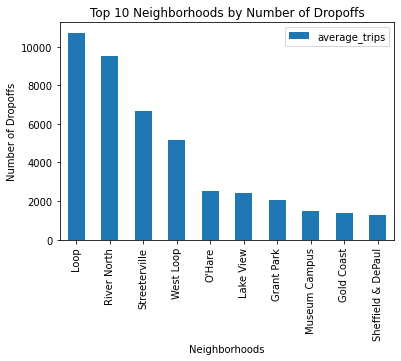

In [241]:
# Graph for top 10 neighborhoods by number of dropoffs

top_ten_neighborhoods = top_ten_neighborhoods.head(10)
top_ten_neighborhoods = top_ten_neighborhoods.set_index('dropoff_location_name')

plt.figure(figsize=(10, 6))
top_ten_neighborhoods.plot(kind='bar')
plt.title('Top 10 Neighborhoods by Number of Dropoffs')
plt.xlabel('Neighborhoods')
plt.ylabel('Number of Dropoffs')
plt.show()

The top neighborhoods by average number of dropoffs >4000 are Loop, River North, Streeterville & West Loop.
While other 6 locations have average number of dropoffs of 2000 & below.

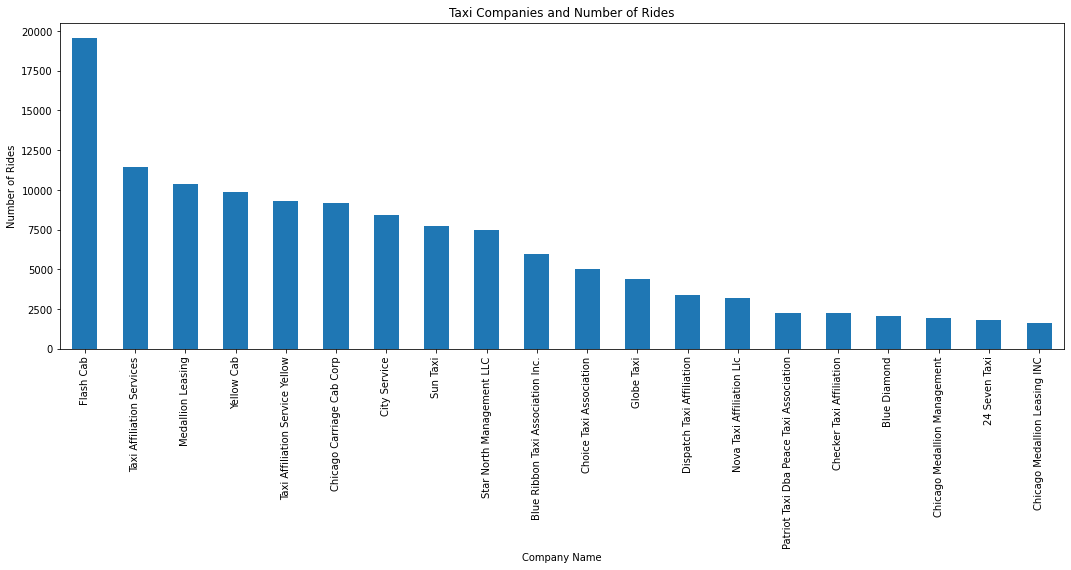

In [242]:
# Graph for taxi companies and number of rides
company_rides = company_name_and_trip.groupby('company_name')['trips_amount'].sum().sort_values(ascending=False)

# Select top 20 companies
top_20_companies = company_rides.nlargest(20)

plt.figure(figsize=(18, 6))
top_20_companies.plot(kind='bar')
plt.title('Taxi Companies and Number of Rides')
plt.xlabel('Company Name')
plt.ylabel('Number of Rides')
plt.show()

There are top 20 companies which number of rides are 2500 and more. While there are many taxi companies have very less number of rides.

## Hypothesis Testing: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

### Importing Data

Importing another dataset from '/datasets/project_sql_result_07.csv'.

It contains data on rides from the Loop to O'Hare International Airport. Below are the table's field values:
1. start_ts - pickup date and time
2. weather_condition - weather conditions at the moment the ride started
3. duration_seconds - ride duration in seconds

In [243]:
loop_ohare_ride = pd.read_csv('/datasets/project_sql_result_07.csv')

In [244]:
loop_ohare_ride.info()
loop_ohare_ride.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


(1068, 3)

In [245]:
# Convert 'start_ts' to datetime and extract the day of week
loop_ohare_ride['start_ts'] = pd.to_datetime(loop_ohare_ride['start_ts'])
loop_ohare_ride['day_of_week'] = loop_ohare_ride['start_ts'].dt.dayofweek

loop_ohare_ride.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
 3   day_of_week         1068 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.5+ KB


### Minimum value for the date

In [246]:
loop_ohare_ride['start_ts'].min()

Timestamp('2017-11-04 00:00:00')

### Maximum value for the date

In [247]:
loop_ohare_ride['start_ts'].max()

Timestamp('2017-11-25 23:00:00')

### Checking for missing value

In [248]:
loop_ohare_ride.isna().sum()

start_ts              0
weather_conditions    0
duration_seconds      0
day_of_week           0
dtype: int64

There is no missing values of this dataset.

### Checking and fixing duplicated values

In [249]:
loop_ohare_ride.duplicated().sum()

197

In [250]:
duplicated_data_loop_ohare_ride = loop_ohare_ride[loop_ohare_ride.duplicated()]
duplicated_data_loop_ohare_ride.sort_values(by='start_ts').tail(20)

,start_ts,weather_conditions,duration_seconds,day_of_week
885,2017-11-18 06:00:00,Good,1500.0,5
543,2017-11-18 06:00:00,Good,1500.0,5
978,2017-11-18 08:00:00,Bad,1620.0,5
524,2017-11-18 08:00:00,Bad,1500.0,5
606,2017-11-18 10:00:00,Bad,1260.0,5
717,2017-11-18 10:00:00,Bad,1560.0,5
196,2017-11-18 10:00:00,Bad,1440.0,5
700,2017-11-18 12:00:00,Bad,2640.0,5
658,2017-11-18 12:00:00,Bad,2700.0,5
531,2017-11-18 12:00:00,Bad,2220.0,5


In [251]:
# removing duplicate due to 1 particular hour has few duration data.
loop_ohare_ride = loop_ohare_ride.drop_duplicates()
loop_ohare_ride = loop_ohare_ride.reset_index(drop=True)
loop_ohare_ride.head(10)

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
5,2017-11-11 04:00:00,Good,1320.0,5
6,2017-11-04 16:00:00,Bad,2969.0,5
7,2017-11-18 11:00:00,Good,2280.0,5
8,2017-11-11 14:00:00,Good,2460.0,5
9,2017-11-11 12:00:00,Good,2040.0,5


### Data Slicing

In [252]:
loop_ohare_ride.describe()

,duration_seconds,day_of_week
count,871.000000,871.0
mean,2096.308840,5.0
std,782.274717,0.0
min,0.000000,5.0
25%,1440.000000,5.0
50%,2015.000000,5.0
75%,2584.000000,5.0
max,7440.000000,5.0


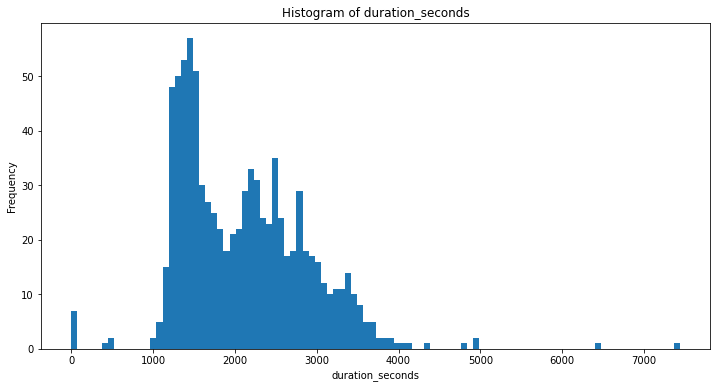

In [253]:
plt.figure(figsize=(12, 6))
plt.hist(loop_ohare_ride['duration_seconds'].values, bins=100)
plt.title('Histogram of duration_seconds')
plt.xlabel('duration_seconds')
plt.ylabel('Frequency')
plt.show()

From the plot, we can see that the duration is centered between 1,000 to 4,000 seconds. Those out of this range are outliers and we shall exclude them in our analysis. 

Average duration of 0 seconds is not logic, seem like the car is not moving or the time is not clocked. Moreover, the average duration more than 4000 seconds seem like too long, it is more than an hour, which is unusual higher than others.

In [254]:
loop_ohare_ride = loop_ohare_ride[(loop_ohare_ride['duration_seconds'] >= 1000) & (loop_ohare_ride['duration_seconds'] <= 4000)]
loop_ohare_ride.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 853 entries, 0 to 870
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            853 non-null    datetime64[ns]
 1   weather_conditions  853 non-null    object        
 2   duration_seconds    853 non-null    float64       
 3   day_of_week         853 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 33.3+ KB


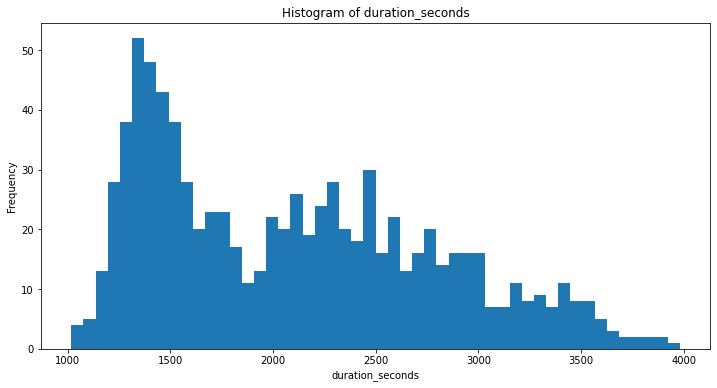

In [255]:
# Checking the distribution again after the data is sliced.
plt.figure(figsize=(12, 6))
plt.hist(loop_ohare_ride['duration_seconds'].values, bins=50)
plt.title('Histogram of duration_seconds')
plt.xlabel('duration_seconds')
plt.ylabel('Frequency')
plt.show()

In [256]:
# Filter data for Saturdays
loop_ohare_ride_saturday = loop_ohare_ride[loop_ohare_ride['day_of_week'] == 5]
loop_ohare_ride_saturday

,start_ts,weather_conditions,duration_seconds,day_of_week
0,2017-11-25 16:00:00,Good,2410.0,5
1,2017-11-25 14:00:00,Good,1920.0,5
2,2017-11-25 12:00:00,Good,1543.0,5
3,2017-11-04 10:00:00,Good,2512.0,5
4,2017-11-11 07:00:00,Good,1440.0,5
...,...,...,...,...
865,2017-11-11 10:00:00,Good,1303.0,5
866,2017-11-04 14:00:00,Good,2700.0,5
867,2017-11-18 16:00:00,Bad,2186.0,5
869,2017-11-11 10:00:00,Good,1318.0,5


In [257]:
# Separate data for rainy and non-rainy Saturdays
rainy_saturdays = loop_ohare_ride_saturday[loop_ohare_ride_saturday['weather_conditions'] == 'Bad']
non_rainy_saturdays = loop_ohare_ride_saturday[loop_ohare_ride_saturday['weather_conditions'] == 'Good']

### Hypothesis Testing between rainy & non rainy Saturday, if the average trip duration is the same

The t-test should be used when the two samples have a normal distribution. To verify this, we can apply a Shapiro test.

If the samples do not have a normal distribution, we will use a Mann-WhitneyU test,  instead of a t-test.

#### T-test

As the sample sizes are large (583 for our study), we will use a Q-Q plot to visually check if the data is normally distributed.

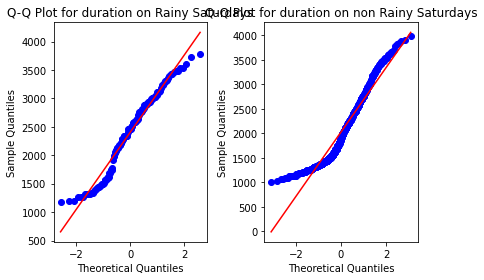

In [258]:
# Q-Q plot for rainy_saturdays
plt.subplot(1, 2, 1)
stats.probplot(rainy_saturdays['duration_seconds'], dist="norm", plot=plt)
plt.title("Q-Q Plot for duration on Rainy Saturdays")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

# Q-Q plot for non_rainy_saturdays
plt.subplot(1, 2, 2)
stats.probplot(non_rainy_saturdays['duration_seconds'], dist="norm", plot=plt)
plt.title("Q-Q Plot for duration on non Rainy Saturdays")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Sample Quantiles")

plt.tight_layout()
plt.show()

From the Q-Q plot, the data points roughly fall along a straight diagonal line, so the datasets are likely follow a normal distribution.

In [259]:
# Calculate the mean, standard deviation, and variance for duration_seconds of rainy_saturdays
rainy_sat_mean = np.mean(rainy_saturdays['duration_seconds'])
rainy_sat_std = np.std(rainy_saturdays['duration_seconds'])
rainy_sat_var = np.var(rainy_saturdays['duration_seconds'])

# Calculate the mean, standard deviation, and variance for duration_seconds of non_rainy_saturdays
non_rainy_sat_mean = np.mean(non_rainy_saturdays['duration_seconds'])
non_rainy_sat_std = np.std(non_rainy_saturdays['duration_seconds'])
non_rainy_sat_var = np.var(non_rainy_saturdays['duration_seconds'])


# Print the results
print("Average Duration from Loop to O'Hare on rainy Saturdays:")
print(f'Mean: {rainy_sat_mean}')
print(f'Standard Deviation: {rainy_sat_std}')
print(f'Variance: {rainy_sat_var}')

print("Average Duration from Loop to O'Hare on non rainy Saturdays:")
print(f'Mean: {non_rainy_sat_mean}')
print(f'Standard Deviation: {non_rainy_sat_std}')
print(f'Variance: {non_rainy_sat_var}')

Average Duration from Loop to O'Hare on rainy Saturdays:
Mean: 2406.8194444444443
Standard Deviation: 678.5525511129654
Variance: 460433.56462191354
Average Duration from Loop to O'Hare on non rainy Saturdays:
Mean: 2026.345557122708
Standard Deviation: 677.8983538794969
Variance: 459546.17819253163


In [260]:
# Checking Homogeneity of Variances
homogeneity_of_variances = rainy_sat_var / non_rainy_sat_var
display('homogeneity_of_variances: ', homogeneity_of_variances)

'homogeneity_of_variances: '

1.001931006004385

From the above steps, we can conclude that the datasets of rainy & non-rainy Saturdays are fulfilling the assumption to proceed for 2-samples t-test.

Independence: The observations in one sample are independent of the observations in the other sample.

Q-Q plot showed that the datasets are normally distributed.

Homogeneity of Variances: The ratio of the larger variance to the smaller variance is less than 4, we can assume the variances are approximately equal and use the two sample t-test.

Random Sampling: Both samples were obtained using a random sampling method.

Formulate Hypotheses:

Null Hypothesis (H0): There is significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.

Alternative Hypothesis (H1): There is no significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.

In [261]:
# Perform t-test
t_stat, p_value = stats.ttest_ind(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])


# Set the significance level (alpha). Alpha value of 0.05 means that we are willing to accept a 5% chance of making a Type I error, which is the probability of rejecting a null hypothesis when it is actually true. In other words, we are comfortable with a 5% chance of concluding there is an effect when there is none.
alpha = 0.05

# Print the results
display('t-stat:', t_stat)
display('p-value:', p_value)

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("Reject the null hypothesis: There is significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.")

't-stat:'

6.132105438204173

'p-value:'

1.3264039645812728e-09

Reject the null hypothesis: There is significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.


#### Shapiro test

In [262]:
# To vefify if our datasets are normal distributed by applying Shapiro test

# Perform Shapiro-Wilk test for rainy_saturdays
shapiro_test_rainy = stats.shapiro(rainy_saturdays['duration_seconds'])

# Perform Shapiro-Wilk test for non_rainy_saturdays
shapiro_test_non_rainy = stats.shapiro(non_rainy_saturdays['duration_seconds'])

# Display the results
print("Shapiro-Wilk Test for Rainy Saturdays:")
print("Test Statistic:", shapiro_test_rainy.statistic)
print("P-value:", shapiro_test_rainy.pvalue)

print("\nShapiro-Wilk Test for Non-Rainy Saturdays:")
print("Test Statistic:", shapiro_test_non_rainy.statistic)
print("P-value:", shapiro_test_non_rainy.pvalue)

Shapiro-Wilk Test for Rainy Saturdays:
Test Statistic: 0.9607909917831421
P-value: 0.0003974967694375664

Shapiro-Wilk Test for Non-Rainy Saturdays:
Test Statistic: 0.9302067160606384
P-value: 1.1754612044376622e-17


Since p-value for both 'rainy_saturdays' & 'non_rainy_saturdays' are less than 0.05, it suggested that both datasets are not normally distributed.

Thus we need to use Mann-WhitneyU test, instead of a t-test. 

#### Mann-WhitneyU Test

In [263]:
# Perfoming MannWhitneyU test
statistic, p_value = mannwhitneyu(rainy_saturdays['duration_seconds'], non_rainy_saturdays['duration_seconds'])

# Display the results
print("Mann-Whitney U Test:")
print("U Statistic:", statistic)
print("P-value:", p_value)

# Set the significance level (alpha). Alpha value of 0.05 means that we are willing to accept a 5% chance of making a Type I error, which is the probability of rejecting a null hypothesis when it is actually true. In other words, we are comfortable with a 5% chance of concluding there is an effect when there is none.
alpha = 0.05

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("Reject the null hypothesis: There is significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.")

Mann-Whitney U Test:
U Statistic: 67398.0
P-value: 1.3142991992039506e-09
Reject the null hypothesis: There is significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.


## Conclusion

1. The top 10 dropoff locations are identified. The top dropoff location is Loop, which is around 10x trips more than Sheffield & DePaul. The top neighborhoods by average number of dropoffs >4000 are Loop, River North, Streeterville & West Loop. While other 6 locations have average number of dropoffs of 2000 & below.
2. From the graph for taxi companies and number of rides, there are top 20 companies which number of rides are 2500 and more. While there are many taxi companies have very less number of rides.
3. From the dataset on the rides from the Loop to O'Hare International Airport, there is a significant difference of the average duration of rides from the Loop to O'Hare International Airport on rainy Saturdays.